In [35]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [36]:
school_shooting = pd.read_csv('data/school_shooting_data.csv')

In [37]:
school_shooting['DateTime'] = pd.to_datetime(school_shooting['date'], format='%m/%d/%Y')
school_shooting = school_shooting[(school_shooting['DateTime'].dt.year > 1999) & (school_shooting['DateTime'].dt.year < 2023)]

In [38]:
print(school_shooting.shape)
school_shooting.head()

(352, 51)


,uid,nces_school_id,school_name,nces_district_id,district_name,date,school_year,year,time,day_of_week,...,long,staffing,low_grade,high_grade,lunch,county,state_fips,county_fips,ulocale,DateTime
7,8,120153001590,Ridgewood High School,1201530.0,Pasco,1/19/2000,1999-2000,2000,3:00 PM,Wednesday,...,-82.687231,85.0,9,12,654,Pasco County,12,12101,21.0,2000-01-19
8,9,062460009581,Alicia Reyes Elementary School,624600.0,Merced City Elementary,1/26/2000,1999-2000,2000,8:34 AM,Wednesday,...,-120.494808,36.0,KG,5,643,Merced County,6,6047,13.0,2000-01-26
9,10,170993000748,Duke Ellington Elementary School,1709930.0,City of Chicago School District 299,2/14/2000,1999-2000,2000,NaN,Monday,...,-87.766042,37.0,PK,6,NaN,Cook County,17,17031,11.0,2000-02-14
10,11,280132000190,Horn Lake High School,2801320.0,Desoto County School District,2/22/2000,1999-2000,2000,NaN,Tuesday,...,-90.035423,65.0,9,12,324,DeSoto County,28,28033,21.0,2000-02-22
11,12,402961001555,Tecumseh High School,4029610.0,Tecumseh,2/24/2000,1999-2000,2000,9:00 AM,Thursday,...,-96.943184,45.5,9,12,184,Pottawatomie County,40,40125,32.0,2000-02-24


In [39]:
print("one school shooting per days:")
(school_shooting['DateTime'].max() - school_shooting['DateTime'].min()).days / len(school_shooting)


one school shooting per days:


23.758522727272727

<BarContainer object of 23 artists>

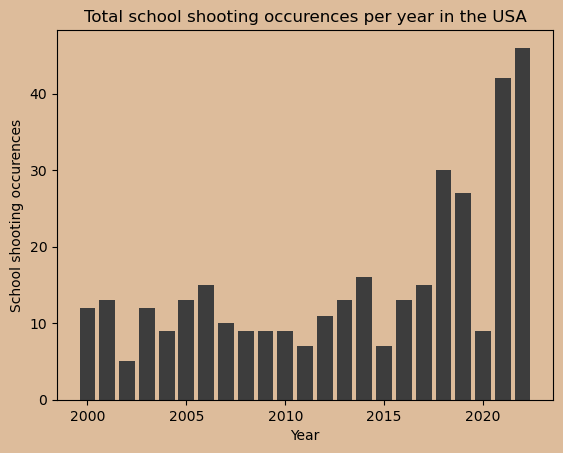

In [78]:
school_shooting['Year'] = school_shooting['DateTime'].dt.year

school_shooting_by_year = school_shooting.loc[:, ['Year']].value_counts().reset_index()

plt.rcParams['figure.facecolor'] = "#ddbc9b"
plt.rcParams['axes.facecolor'] = "#ddbc9b"

plt.title("Total school shooting occurences per year in the USA")
plt.xlabel("Year")
plt.ylabel("School shooting occurences")
plt.bar(school_shooting_by_year['Year'], school_shooting_by_year[0], color='#3d3d3d')